In [2]:
from __future__ import print_function
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
import seaborn as sb 
from pandas import Series,DataFrame
from numpy.random import randn 
from matplotlib import rcParams 
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import SparkSession

get_ipython().run_line_magic('matplotlib', 'inline')
rcParams['figure.figsize']=10,10
sb.set_style('whitegrid')
warnings.filterwarnings("ignore")

In [33]:
# Load the library with the iris dataset
from sklearn.datasets import load_iris

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Set random seed
np.random.seed(0)

In [108]:
add = 'C:\data_train.csv'
train = pd.read_csv(add)

In [109]:
add = 'C:\data_test.csv'
test = pd.read_csv(add)

In [110]:
train.head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [111]:
len(train)

3333

In [112]:
test.head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,HI,101,510,354-8815,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,MT,137,510,381-7211,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,OH,103,408,411-9481,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,NM,99,415,418-9100,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,SC,108,415,413-3643,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.


In [113]:
len(test)

1667

In [114]:
train.describe()

,acclen,arcode,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [115]:
train.corr()

,acclen,arcode,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc
acclen,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
arcode,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572
nummailmes,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
tdmin,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
tdcal,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
tdchar,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
temin,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
tecal,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
tecahr,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
tnmin,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288


In [116]:
label = train['label']

In [117]:
label.head()

0     False.
1     False.
2     False.
3     False.
4     False.
Name: label, dtype: object

In [118]:
features = train.columns[:]
features

Index(['st', 'acclen', 'arcode', 'phnum', 'intplan', 'voice', 'nummailmes',
       'tdmin', 'tdcal', 'tdchar', 'temin', 'tecal', 'tecahr', 'tnmin',
       'tncal', 'tnchar', 'timin', 'tical', 'tichar ', 'ncsc', 'label'],
      dtype='object')

In [119]:
y = pd.factorize(train['label'])[0]

In [120]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [121]:
i = 0
while(i<30):
    print(y[i])
    i+=1

0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0


In [122]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)

In [123]:
train.head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [128]:
features

Index(['st', 'acclen', 'arcode', 'phnum', 'intplan', 'voice', 'nummailmes',
       'tdmin', 'tdcal', 'tdchar', 'temin', 'tecal', 'tecahr', 'tnmin',
       'tncal', 'tnchar', 'timin', 'tical', 'tichar ', 'ncsc', 'label'],
      dtype='object')

In [131]:

train = train.drop(['phnum'],axis=1)
features = train.columns[:]
features

Index(['acclen', 'arcode', 'intplan', 'voice', 'nummailmes', 'tdmin', 'tdcal',
       'tdchar', 'temin', 'tecal', 'tecahr', 'tnmin', 'tncal', 'tnchar',
       'timin', 'tical', 'tichar ', 'ncsc', 'label'],
      dtype='object')

In [132]:
train['acclen'] = pd.to_numeric(train['acclen'])

In [133]:
train.head()

,acclen,arcode,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [135]:
train = train.drop(['label'],axis=1)
features = train.columns[:]
features

Index(['acclen', 'arcode', 'intplan', 'voice', 'nummailmes', 'tdmin', 'tdcal',
       'tdchar', 'temin', 'tecal', 'tecahr', 'tnmin', 'tncal', 'tnchar',
       'timin', 'tical', 'tichar ', 'ncsc'],
      dtype='object')

In [137]:
train['intplan'] = pd.factorize(train['intplan'])[0]

In [138]:
train.head()

,acclen,arcode,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc
0,128,415,0,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [139]:
train['voice'] = pd.factorize(train['voice'])[0]

In [140]:
train.head()

,acclen,arcode,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [141]:
features

Index(['acclen', 'arcode', 'intplan', 'voice', 'nummailmes', 'tdmin', 'tdcal',
       'tdchar', 'temin', 'tecal', 'tecahr', 'tnmin', 'tncal', 'tnchar',
       'timin', 'tical', 'tichar ', 'ncsc'],
      dtype='object')

In [142]:
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [144]:
test.head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,HI,101,510,354-8815,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,MT,137,510,381-7211,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,OH,103,408,411-9481,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,NM,99,415,418-9100,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,SC,108,415,413-3643,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.


In [145]:
test = test.drop(['st'],axis=1)
test = test.drop(['phnum'],axis=1)
test.head()

,acclen,arcode,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,101,510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,137,510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,103,408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,99,415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,108,415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.


In [146]:
test['intplan'] = pd.factorize(test['intplan'])[0]
test['voice'] = pd.factorize(test['voice'])[0]
test.head()

,acclen,arcode,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,101,510,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,137,510,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,103,408,0,1,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,99,415,0,0,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,108,415,0,0,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.


In [147]:
features


Index(['acclen', 'arcode', 'intplan', 'voice', 'nummailmes', 'tdmin', 'tdcal',
       'tdchar', 'temin', 'tecal', 'tecahr', 'tnmin', 'tncal', 'tnchar',
       'timin', 'tical', 'tichar ', 'ncsc'],
      dtype='object')

In [148]:
test = test.drop(['label'],axis=1)
test.head()

,acclen,arcode,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc
0,101,510,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3
1,137,510,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0
2,103,408,0,1,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1
3,99,415,0,0,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1
4,108,415,0,0,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2


In [149]:
features

Index(['acclen', 'arcode', 'intplan', 'voice', 'nummailmes', 'tdmin', 'tdcal',
       'tdchar', 'temin', 'tecal', 'tecahr', 'tnmin', 'tncal', 'tnchar',
       'timin', 'tical', 'tichar ', 'ncsc'],
      dtype='object')

In [151]:
final = clf.predict(test[features])
final

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [153]:
clf.predict_proba(test[features])[0:50]

array([[1. , 0. ],
       [0.8, 0.2],
       [0.3, 0.7],
       [1. , 0. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.9, 0.1],
       [1. , 0. ],
       [0.7, 0.3],
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [0.4, 0.6],
       [0.7, 0.3],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1]])

In [156]:
len(final)

1667

In [157]:
add = 'C:\data_test.csv'
test = pd.read_csv(add)

In [158]:
test.head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,HI,101,510,354-8815,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,MT,137,510,381-7211,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,OH,103,408,411-9481,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,NM,99,415,418-9100,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,SC,108,415,413-3643,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.


In [159]:
label = test['label']
label

0        False.
1        False.
2        False.
3        False.
4        False.
5        False.
6        False.
7        False.
8        False.
9        False.
10       False.
11       False.
12       False.
13       False.
14       False.
15       False.
16       False.
17       False.
18       False.
19       False.
20       False.
21       False.
22       False.
23       False.
24       False.
25       False.
26       False.
27       False.
28       False.
29       False.
         ...   
1637     False.
1638     False.
1639     False.
1640     False.
1641     False.
1642     False.
1643     False.
1644     False.
1645     False.
1646     False.
1647      True.
1648     False.
1649     False.
1650     False.
1651     False.
1652     False.
1653     False.
1654     False.
1655     False.
1656     False.
1657      True.
1658      True.
1659     False.
1660     False.
1661     False.
1662     False.
1663      True.
1664     False.
1665     False.
1666     False.
Name: label, Length: 166

In [160]:
label[0]

' False.'

In [161]:
test['label'] = pd.factorize(test['label'])[0]

In [162]:
test.head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,HI,101,510,354-8815,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
1,MT,137,510,381-7211,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
2,OH,103,408,411-9481,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
3,NM,99,415,418-9100,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
4,SC,108,415,413-3643,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0


In [163]:
label = test['label']
label.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [164]:
tp = 0
tn = 0 
fp = 0 
fn = 0 

In [165]:
len(label)

1667

In [166]:
for i in range(0,1667):
    if(final[i]==1 and label[i]==1):
        tp+=1
    elif(final[i]==0 and label[i]==0):
        tn+=1
    elif(final[i]==1 and label[i]==0):
        fp+=1
    elif(final[i]==0 and label[i]==1):
        fn+=1
    

In [167]:
print(tp)
print(tn)
print(fp)
print(fn)

99
1430
13
125


In [168]:
print(tp+tn+fn+fp)

1667


In [173]:
acc = ((tp+tn)/1667)*100
print('Accuracy: ' + str(acc))

Accuracy: 91.72165566886623


In [174]:
recall = tp/(tp+fn)
print('Recall value is: ' + str(recall))

Recall value is: 0.4419642857142857


In [175]:
prec = tp/(tp+fp)
print('precision is: ' + str(prec))

precision is: 0.8839285714285714


In [176]:
f1 = 2*((prec*recall)/(prec+recall))
print('F1 score is: ' + str(f1))

F1 score is: 0.5892857142857142


In [190]:
importance = list(zip(train[features], clf.feature_importances_))
importance 

[('acclen', 0.029872237046511235),
 ('arcode', 0.009808211250656536),
 ('intplan', 0.06978198434252024),
 ('voice', 0.02628148445391404),
 ('nummailmes', 0.03268833702375003),
 ('tdmin', 0.1235604392389817),
 ('tdcal', 0.029180276375764515),
 ('tdchar', 0.15741285869643026),
 ('temin', 0.06681317978475358),
 ('tecal', 0.02220825376025196),
 ('tecahr', 0.06758997777297868),
 ('tnmin', 0.03774282014850301),
 ('tncal', 0.02795763063172028),
 ('tnchar', 0.0331781917156777),
 ('timin', 0.05436924356552277),
 ('tical', 0.053568173224069524),
 ('tichar ', 0.027451002465742485),
 ('ncsc', 0.13053569850225144)]

In [178]:
totalp = 0
totaln = 0
for i in range(0,1667):
    if(label[i]==0):
        totalp+=1
    elif(label[i]==1):
        totaln+=1

In [179]:
totaln/1667

0.13437312537492502

In [180]:
print('People churned out in % is: ' + str((totaln/1667)*100))

People churned out in % is: 13.437312537492502


In [182]:
final

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [183]:
test.head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,HI,101,510,354-8815,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
1,MT,137,510,381-7211,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
2,OH,103,408,411-9481,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
3,NM,99,415,418-9100,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
4,SC,108,415,413-3643,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0


In [185]:
pd.crosstab(test['label'], final, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1
Actual Species,,
0,1430,13
1,125,99


In [194]:
train.head()

,acclen,arcode,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [195]:
feat = ['tdchar','ncsc','tdmin','intplan','tecahr']

In [196]:
clf2 = RandomForestClassifier(n_jobs=2, random_state=0)

In [197]:
clf2.fit(train[feat], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [198]:
test.head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,HI,101,510,354-8815,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
1,MT,137,510,381-7211,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
2,OH,103,408,411-9481,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
3,NM,99,415,418-9100,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
4,SC,108,415,413-3643,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0


In [199]:
test = test.drop(['st'],axis=1)
test = test.drop(['phnum'],axis=1)
test = test.drop(['label'],axis=1)
test['intplan'] = pd.factorize(test['intplan'])[0]
test['voice'] = pd.factorize(test['voice'])[0]
test.head()

,acclen,arcode,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc
0,101,510,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3
1,137,510,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0
2,103,408,0,1,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1
3,99,415,0,0,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1
4,108,415,0,0,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2


In [200]:
clf2.predict(test[feat])

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [201]:
final2 = clf2.predict(test[feat])
final2

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [202]:
add = 'C:\data_test.csv'
test = pd.read_csv(add)

In [203]:
test.head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,HI,101,510,354-8815,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,MT,137,510,381-7211,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,OH,103,408,411-9481,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,NM,99,415,418-9100,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,SC,108,415,413-3643,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.


In [204]:
label

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1637    0
1638    0
1639    0
1640    0
1641    0
1642    0
1643    0
1644    0
1645    0
1646    0
1647    1
1648    0
1649    0
1650    0
1651    0
1652    0
1653    0
1654    0
1655    0
1656    0
1657    1
1658    1
1659    0
1660    0
1661    0
1662    0
1663    1
1664    0
1665    0
1666    0
Name: label, Length: 1667, dtype: int64

In [205]:
tp = 0
tn = 0 
fp = 0 
fn = 0 

for i in range(0,1667):
    if(final2[i]==1 and label[i]==1):
        tp+=1
    elif(final2[i]==0 and label[i]==0):
        tn+=1
    elif(final2[i]==1 and label[i]==0):
        fp+=1
    elif(final2[i]==0 and label[i]==1):
        fn+=1
        
print(tp)
print(tn)
print(fp)
print(fn)

97
1393
50
127


In [206]:
acc = ((tp+tn)/1667)*100
print('Accuracy: ' + str(acc))

Accuracy: 89.38212357528495


In [207]:
recall = tp/(tp+fn)
print('Recall value is: ' + str(recall))

Recall value is: 0.4330357142857143


In [208]:
test.head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,HI,101,510,354-8815,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,MT,137,510,381-7211,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,OH,103,408,411-9481,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,NM,99,415,418-9100,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,SC,108,415,413-3643,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.


In [209]:
test['label'] = pd.factorize(test['label'])[0]

In [210]:
test.head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,HI,101,510,354-8815,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
1,MT,137,510,381-7211,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
2,OH,103,408,411-9481,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
3,NM,99,415,418-9100,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
4,SC,108,415,413-3643,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0


In [211]:
pd.crosstab(test['label'], final2, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1
Actual Species,,
0,1393,50
1,127,97


In [212]:
print(tp)
print(tn)
print(fp)
print(fn)

97
1393
50
127


In [213]:
tp = 99
tn =  1430
fp = 13
fn =  125

<BarContainer object of 4 artists>

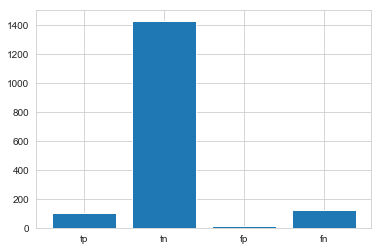

In [214]:
x = ['tp', 'tn', 'fp', 'fn']
y = [tp,tn,fp,fn]
plt.bar(x,y)

([<matplotlib.patches.Wedge at 0x1f23d73cc18>,
 [Text(1.0809101958270924, 0.20404202644807465, ''),
  Text(-1.0970302170681108, 0.08077563270872065, ''),
  Text(0.9676287838518394, -0.5231582329099014, ''),
  Text(1.0696190194546553, -0.2567394656473015, '')])

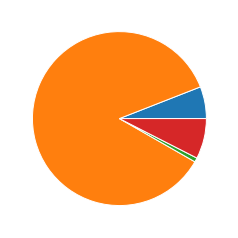

In [215]:
y = [tp,tn,fp,fn]
plt.pie(y)